In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset,Dataset, DataLoader
import glob
from PIL import Image
from matplotlib.pyplot import imshow
import pandas as pd
import h5py

/usr/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_pictures = glob.glob("./train/*")
val_pictures = glob.glob("./valid/*")
real_features = np.load("./original/train.npy")
img = Image.open(train_pictures[13])
img = img.resize((224,224))
img =np.asarray(img)
train_pictures = sorted(train_pictures)
print(train_pictures)

['./train/t0.jpg', './train/t1.jpg', './train/t10.jpg', './train/t100.jpg', './train/t1000.jpg', './train/t1001.jpg', './train/t1002.jpg', './train/t1003.jpg', './train/t1004.jpg', './train/t1005.jpg', './train/t1006.jpg', './train/t1007.jpg', './train/t1008.jpg', './train/t1009.jpg', './train/t101.jpg', './train/t1010.jpg', './train/t1011.jpg', './train/t1012.jpg', './train/t1013.jpg', './train/t1014.jpg', './train/t1015.jpg', './train/t1016.jpg', './train/t1017.jpg', './train/t1018.jpg', './train/t1019.jpg', './train/t102.jpg', './train/t1020.jpg', './train/t1021.jpg', './train/t1022.jpg', './train/t1023.jpg', './train/t1024.jpg', './train/t1025.jpg', './train/t1026.jpg', './train/t1027.jpg', './train/t1028.jpg', './train/t1029.jpg', './train/t103.jpg', './train/t1030.jpg', './train/t1031.jpg', './train/t1032.jpg', './train/t1033.jpg', './train/t1034.jpg', './train/t1035.jpg', './train/t1036.jpg', './train/t1037.jpg', './train/t1038.jpg', './train/t1039.jpg', './train/t104.jpg', './t

(224, 224, 3)
uint8


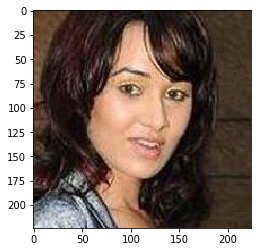

In [3]:
print(img.shape)
print(img.dtype)
imshow(img)

In [4]:
f = h5py.File("train_vectors.hdf5","w")
dset = f.create_dataset("myset",(5000,3,224,224),dtype='i8')
f.close()


In [6]:

for index,name in enumerate([train_pictures]):
    img = Image.open(train_pictures[13])
    img = img.resize((224,224))
    img =np.asarray(img)
    img = np.transpose(img, (2, 0, 1))
    dset[index] = img

ValueError: Not a dataset (Not a dataset)

In [24]:
class AgeDataset(Dataset):
    def __init__(self, type="train" , transform=[] ):
        
        self.train_pictures = glob.glob("./train/*")
        self.val_pictures = glob.glob("./valid/*")
        if(type=="train"):
            self.pictures = self.train_pictures
            self.labels = np.load("./original/train_gt.npy")
        else:
            self.pictures = self.val_pictures
            self.labels = np.load("./original/valid_gt.npy")

        self.labels = torch.from_numpy(self.labels).view(-1,1).float()
            
        
        self.transform = transform
        self.scaler = transforms.Resize((224, 224))
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                              std=[0.229, 0.224, 0.225])
        self.to_tensor = transforms.ToTensor()

    def __len__(self):
        return len(self.pictures)

    def __getitem__(self, idx):
        
        img = Image.open(self.train_pictures[idx])
        img = self.scaler(img)

        for trs in self.transform:
            img = trs(img)

        img = self.to_tensor(img)
        if img.shape[0]==1:
            img = img.repeat(3,1,1)
        #img = self.normalize(img)
        
        #if not (self.transform is None):
        #    sample = self.transform(sample)
        
        label = self.labels[idx]

        return img,label

In [25]:
dset = AgeDataset()
dataloader = DataLoader(dset,4,shuffle=True, num_workers=4)



torch.Size([4, 3, 224, 224])
torch.Size([4, 1])
(224, 224, 3)


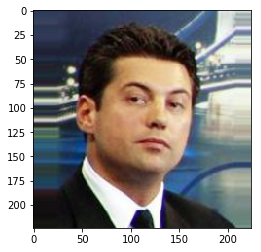

In [43]:
for c,d in dataloader:
    a =c
    b = d
    print(a.shape)
    print(b.shape)
    img=a[1].numpy().transpose((1,2,0))
    print(img.shape)
    imshow(img)
    break

In [12]:
a = Variable(a)
resnet_18 = torchvision.models.resnet18(pretrained=True)
resnet_18.eval();
avgpool_layer = resnet_18._modules.get('avgpool')
my_embedding = torch.zeros(4, 512, 1, 1)
def fun(m, i, o): my_embedding.copy_(o.data)
h = avgpool_layer.register_forward_hook(fun)
h_x = resnet_18(a)
h.remove()

NameError: name 'Variable' is not defined

In [13]:
my_embedding[0].numpy() == real_features[0]

NameError: name 'my_embedding' is not defined

In [19]:
dset_val = AgeDataset(type="val")
for i in dset_val:
    print(i[0].shape)
    print(i[1])
    print(i[1].shape)
    print(i[2].shape)

torch.Size([3, 224, 224])
56.0
()


IndexError: tuple index out of range